In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
class KNeighborsClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            distances = np.sqrt(np.sum((self.X_train - X[i])**2, axis=1))
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            y_pred.append(np.bincount(nearest_labels).argmax())
        return np.array(y_pred)

In [18]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred)*100,'%')
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred)*100,'%')

Training Accuracy: 93.875 %
Testing Accuracy: 94.5 %


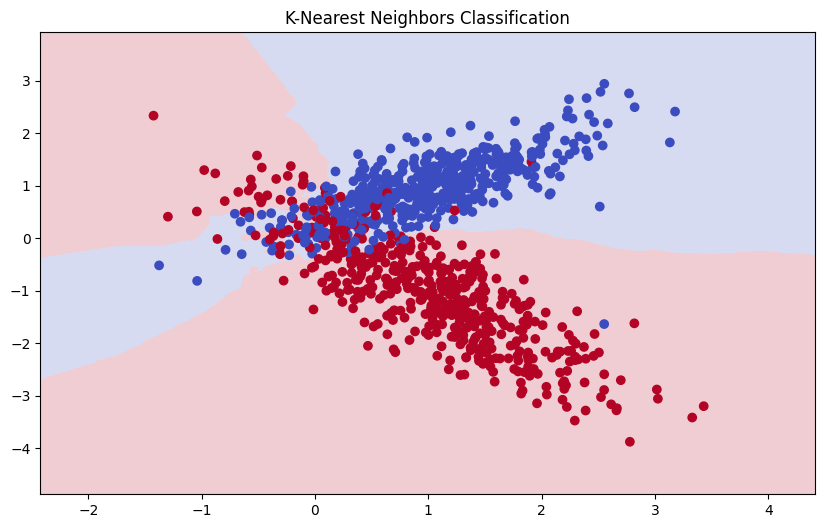

In [20]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.pcolormesh(xx, yy, Z, cmap='coolwarm', alpha=0.2)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-Nearest Neighbors Classification")
plt.show()